## Intro
I will be analyzing Titanic Data which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

Below you can find all the steps I have performed to answer questions about the data, mainly what factors made passengers more likely to survive

## Importing libraries

In [20]:
%pylab inline
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Importing CSV with data
Importing data with Pandas `read_csv` function. Then outputting first 10 rows to get acquainted with the data structure.

In [79]:
titanic_df = pd.read_csv('titanic-data.csv', sep=',')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Looking at the data above I can conclude that to answer my question stated in the Intro section I can use **Survived** as my dependent variable. As independeent variables I chose **Pclass** (Passenger Class), **Sex**, **Age**, **SibSp** (Number of Siblings/Spouses Aboard), **Parch** (Number of Parents/Children Aboard).

## Investigating the Data

Firstly, I want to make sure that there are no values missing for my dependent and independent variables. To do this I will calculate the number of NaNs for variables.

In [118]:
print 'Total number of rows: ', len(titanic_df), '\n'

def check_missing_values(df, index):
    for i in index:
        print 'Number of missing',i,'data points:', df[i].isnull().sum()
    
check_missing_values(titanic_df, ['Survived', 'Pclass','Sex','Age','SibSp', 'Parch'])

Total number of rows:  891 

Number of missing Survived data points: 0
Number of missing Pclass data points: 0
Number of missing Sex data points: 0
Number of missing Age data points: 177
Number of missing SibSp data points: 0
Number of missing Parch data points: 0


From the above we see that there are **177** records out of **891** (20%) that have age missing. 20% is a significant portion of the dataset and I do not want to exclude the passangers with a missing age data point from my analysis. To fix the problem I will fill the missing values with the median age for Passanger Class & Gender group.

In [81]:
titanic_df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [120]:
##Adding column for the new age data to the dataframe
titanic_df['new_age'] = titanic_df['Age']

grouped_data = titanic_df.groupby(['Pclass', 'Sex'])['Age']
titanic_df['new_age'].fillna(grouped_data.transform("median"), inplace=True)

## Checking the results of manipulation
check_missing_values(titanic_df, ['new_age'])
titanic_df.head(10)

Number of missing new_age data points: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,25.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0


Now, the data looks clean and we can proceed to analyzing it. First, I want to see the correlation between Passenger Class and likelyhood to survive

In [126]:
##Number of survivals by class
titanic_df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

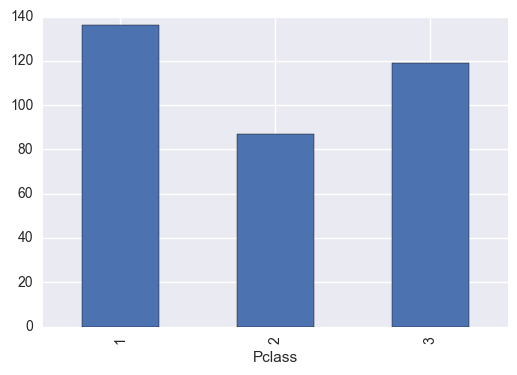

In [127]:
titanic_df.groupby('Pclass')['Survived'].sum().plot(kind='bar')

From the above results we can see that the most survivals are from the people in the Frist Class. 

What surpsied me is that before analysis I was thinking that the lower the class the less survivals there were because the higher the class the more privileged you were on the ship, having rooms closer to the top of the ship. However, we can see that there are not much less survivals in the 3rd class compared to the 1st.

Now, I am curious how passangers in these 3 classes differ. What could have possibly made 3rd class passangers almost as likely to survive as the 1st class passangers?